__Agenda__

1. Introduction to unsupervised learning

2. Clustering

3. Kmeans algorithm details

4. Implementation of kmeans with sklearn

5. How to choose number of clusters: Silhouette & Calinski-Harabasz score

6. Challenge

7. An interesting application of the kmeans algorithm with image processing.

8. Summary

# Unsupervised Learning

- Association Rules

- Cluster Analysis

- Principal Components, Curves and Surfaces

- Indepedent Component Analysis

- Multidimensional Scaling

- Non-linear Dimension Reduction

<img src="img/map_of_ml.png" width=650, height=650> 

[Img source](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)


## Clustering

A clustering problem is where you want to discover the inherent groupings in the data.

## K-Means  Algorithm


<img src="img/kmeans.png" width=650, height=650> 

[Kmeans on Toy dataset](https://healthcare.ai/step-step-k-means-clustering/)

[Let's see kmeans in action](https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68)


[This notebook is motivated from](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html)

In [8]:
## make_blobs and make_moons give us simulated data
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

## From sklearn.cluster we will call KMeans
from sklearn.cluster import KMeans

## Some other necessary libraries
import matplotlib.pyplot as plt
import numpy as np

## to retrive some data 
import pickle 


## To be able to reproduce the results let's set the random_seed

%matplotlib inline  

In [13]:
np.random.seed(110119)

X, y = make_blobs(n_samples = 700, n_features = 2, centers = 4, cluster_std= .5)

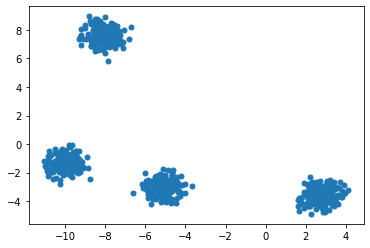

In [14]:
## can you plot this dataset

plt.scatter(X[:, 0], X[:, 1], s = 25);

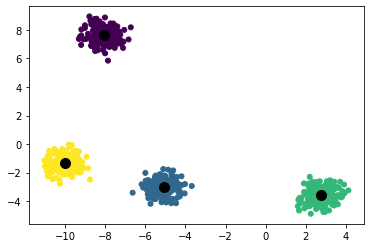

In [15]:

## let's instantiate kmeans algorithm
## don't forget to check its parameters
k_means = KMeans(n_clusters= 4)

# dont forget to fit the model!
k_means.fit(X)

## we make a prediction for each point
y_hat = k_means.predict(X)

## we can access the coordinates of the cluster centers by cluster_centers_ method
cl_centers = k_means.cluster_centers_

## note that the colors are different - Is this a problem?
plt.scatter(X[:,0], X[:,1], c = y_hat, s = 25)


## also let's mark the cluster centers too.
plt.scatter(cl_centers[:, 0], cl_centers[:, 1], c='black', s=100);


__Your Turn__

- Guess how many cluster are there in the figure below.

- Use kmeans to find clusters.

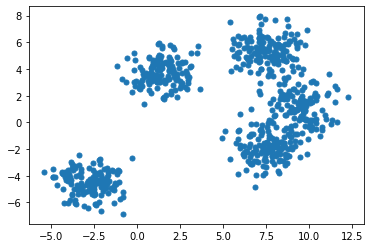

In [16]:
dbfile = open('blobs_1.obj', 'rb')      
data = pickle.load(dbfile) 

X = data[0]

## can you plot this dataset

plt.scatter(X[:, 0], X[:, 1], s = 25);


__Compare your results with the actual values below.__

- Do they close to the actual values?

- What might go wrong?



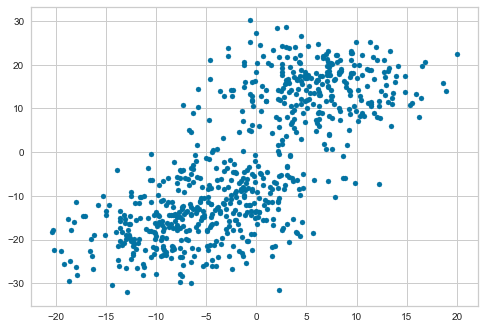

In [59]:
[X,y] = pickle.load(open( "blobs_2.obj", "rb"))
plt.scatter(X[:,0], X[:,1], s = 25)
plt.show()

[[ -4.11938513 -15.17122799]
 [  6.82830345  19.19351251]
 [ -1.69416291  -5.57936913]
 [  5.14068885   9.65152304]
 [-11.4628265  -21.02278608]]


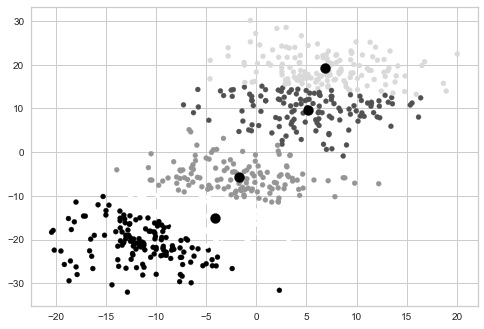

In [67]:
# %load -r 20-39 support.py
## let's instantiate kmeans algorithm
## don't forget to check its parameters
k_means = KMeans(n_clusters= 5)

# dont forget to fit the model!
k_means.fit(X)

## we make a prediction for each point
y_hat = k_means.predict(X)

## we can access the coordinates of the cluster centers by cluster_centers_ method
cl_centers = k_means.cluster_centers_

print(cl_centers)
## note that the colors are different - Is this a problem?
plt.scatter(X[:,0], X[:,1], c = y_hat, s = 25)


## also let's mark the cluster centers too.
plt.scatter(cl_centers[:, 0], cl_centers[:, 1], c='black', s=100);

Q: How do we find optimal K value?

[Metrics](https://scikit-learn.org/stable/modules/clustering.html#k-mean)

[Calinski_Harabasz](https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index)

[Silhoutte Coefficients](https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient)

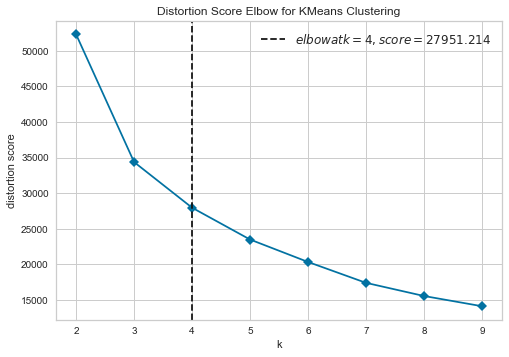

In [62]:
##  install yellowbrck library -- pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()

visualizer = KElbowVisualizer(model, k=(2,10), metric = 'distortion', timings=False)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


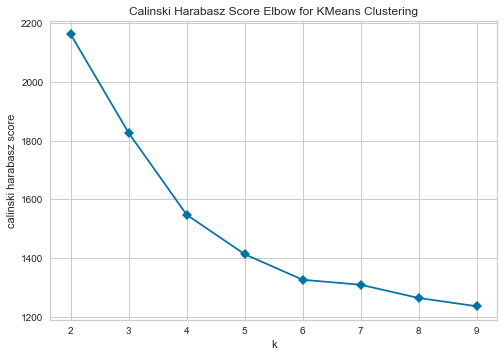

In [64]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,10), metric='calinski_harabasz', timings=False, locate_elbow=True
                        )

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

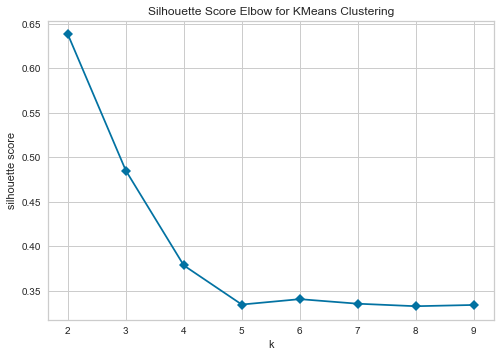

In [65]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model,
                              k=(2,10),
                              metric='silhouette', 
                              timings=False, 
                              locate_elbow=True)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

[Yellowbrick API](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html)

## Exercise:
### K-means on larger dataset - Wine subscription

You want to run a wine subscription service, but you have no idea about wine tasting notes. You are a person of science.
You have a wine dataset of scientific measurements.
If you know a customer likes a certain wine in the dataset, can you recommend other wines to the customer in the same cluster?

<img src="https://images.pexels.com/photos/1097425/pexels-photo-1097425.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260" width=250, height=250> 


#### Questions:
- How many clusters are in the wine dataset?
- What are the characteristics of each clusters?
- What problems do you see potentially in the data?

the dataset is `Wine.csv`

Instructions:
 - [Scaling?](https://stats.stackexchange.com/questions/89809/is-it-important-to-scale-data-before-clustering)

In [78]:
import pandas as pd
# Work on problem here:
wine = pd.read_csv('data/kmeans_wine.csv', index_col = 0)
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### An interesting application of clustering: Color compression

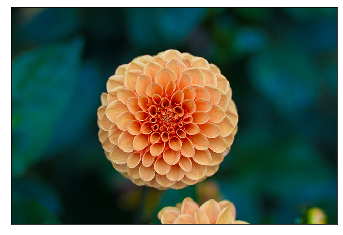

In [3]:
## More interesting case with kmeans clustering

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
import numpy as np


flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

In [4]:
flower.shape
data = flower / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

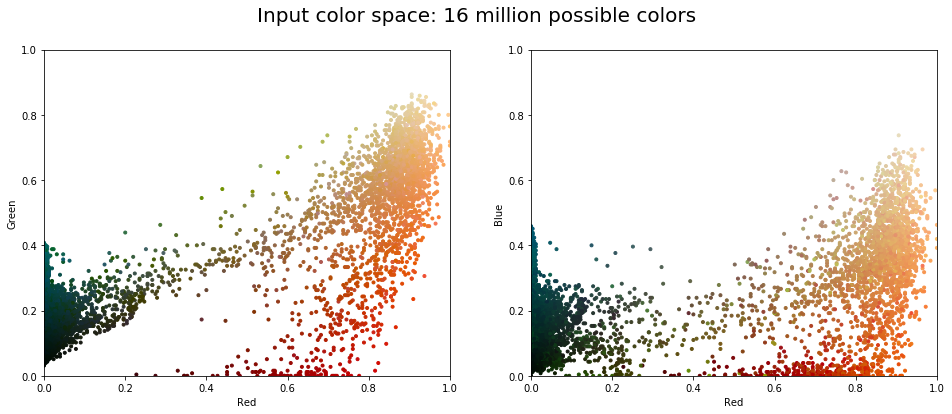

In [5]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);
    
plot_pixels(data, title='Input color space: 16 million possible colors')


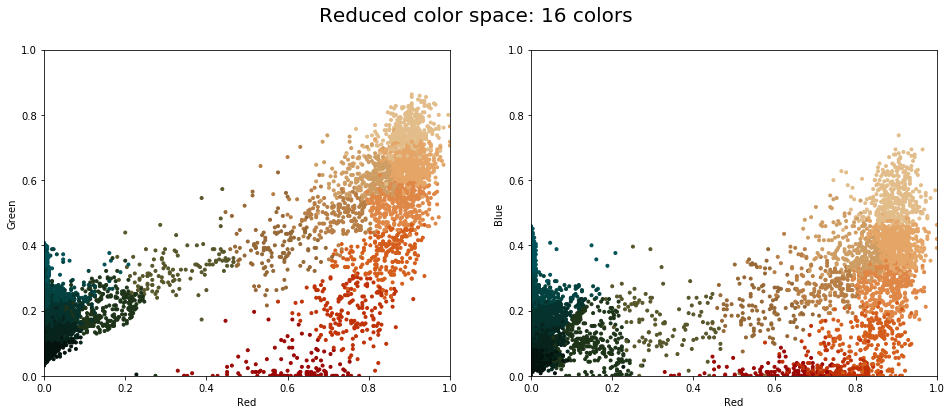

In [6]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

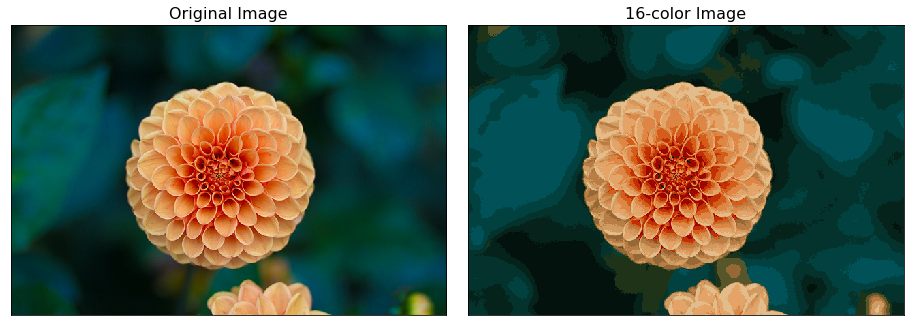

In [7]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

## More on Clustering Algorithms

- [Other popular clustering algorithms ](https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68)

## For the Wine dataset Exercise

The original problem for the wine data is a classification problem. So each wine is labeled with three classes. If you were able to detect it it is nice. But recall if you found more than 3 cluster in the data this might be true too. Try to interpret your result according to different types of wines. You can access to the original data in data folder. 

[Tutorial for the wine dataset. It is in R but you can still follow the work](https://www.kaggle.com/xvivancos/tutorial-clustering-wines-with-k-means)